In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Demos 1 & 2

**USING THE corner DEMO DATA FROM https://corner.readthedocs.io/en/latest/pages/custom**

Generate the data

In [2]:
ndim, nsamples = 4, 50000 
np.random.seed(1234)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape(
    [4 * nsamples // 5, ndim]
)
mean = 4 * np.random.rand(ndim)
data2 = mean[None, :] + np.random.randn(ndim * nsamples // 5).reshape(
    [nsamples // 5, ndim]
)
samples = np.vstack([data1, data2]); print(samples)

[[ 0.47143516 -1.19097569  1.43270697 -0.3126519 ]
 [-0.72058873  0.88716294  0.85958841 -0.6365235 ]
 [ 0.01569637 -2.24268495  1.15003572  0.99194602]
 ...
 [ 4.42510225  0.26847541  1.97209812  0.45052213]
 [ 2.63068782  1.34164265  2.16147582 -0.1408126 ]
 [ 1.62859825  2.91579255  3.5037817  -0.38574019]]


In [3]:
# !pip3 list

Package                      Version
---------------------------- -------------------
absl-py                      1.4.0
adapt                        0.4.4
affine                       2.3.0
aiosignal                    1.3.2
ansi2html                    1.9.2
anyio                        4.8.0
appdirs                      1.4.4
appnope                      0.1.4
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
astropy                      5.3.4
astropy-iers-data            0.2024.1.22.0.30.30
astroquery                   0.4.7
asttokens                    3.0.0
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.3.0
babel                        2.16.0
backports.tarfile            0.0.0
basemap-data                 1.3.2
basemap-data-hires           1.3.2
beautifulsoup4               4.12.3
bleach                       5.0.1
bokeh                        2.4.3
boltons             

In [4]:
from scorner import scorner

**Demo 1 - minimum working code. Using test_run=True option as can take a while**

Testing on 500 rows


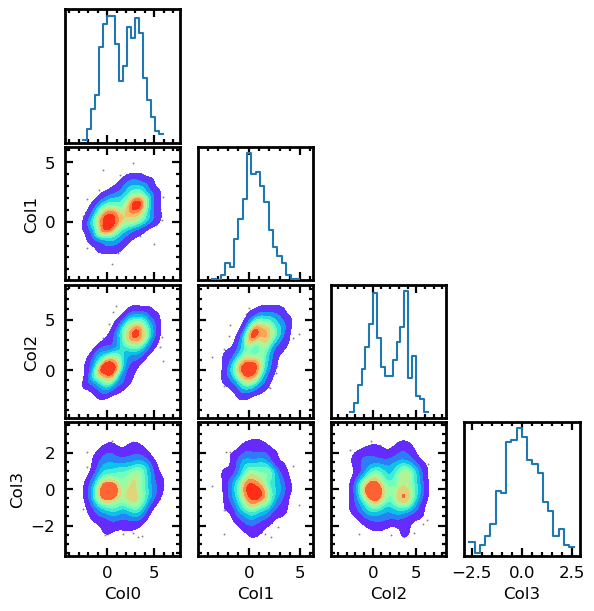

In [5]:
scorner.scorner(samples,test_run=True)

CF. 1 PLOT ON https://corner.readthedocs.io/en/latest/pages/custom

**Demo 2 - showing the true values and the distribution statistics (above the panel)**

Testing on 500 rows


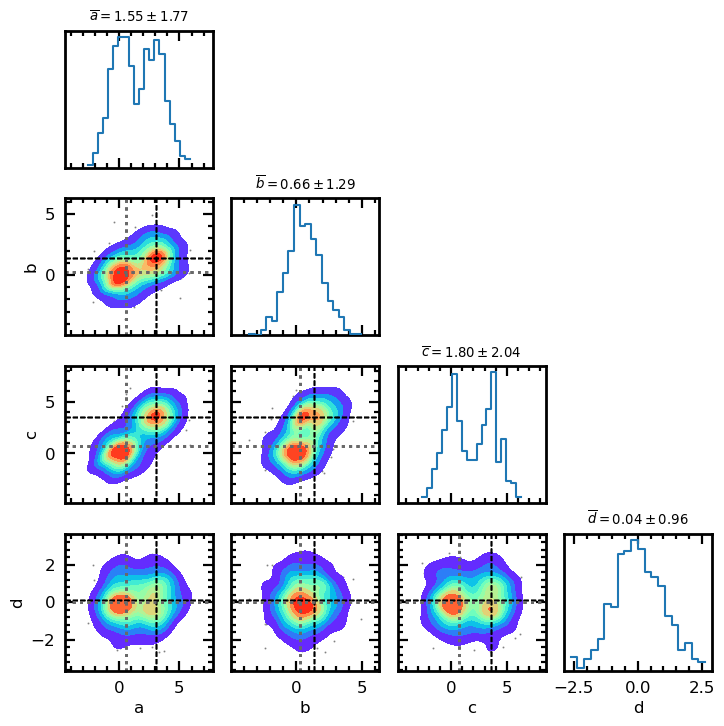

In [6]:
# Putting in two sets of true values as an array
value1 = mean; value2 = np.mean(samples, axis=0)
true_v = list(value1) + list(value2) # TRUE VALUES IN A SINGLE ARRAY
true_v =  np.reshape(true_v,(2,-1)) 
true_s = [['--',1,'k'],['dotted',2,'dimgrey']] # TRUE VALUE LINE STYLES

scorner.scorner(samples,test_run=True,true_values=true_v,true_style = true_s,
           cols = ['a','b','c','d'],height = 1.8, fs=10,tlp = 0.5,
          show_stats=True,stats_in = False)

### Demo 3 - input direct from an existing array

**Showing the true values and the distribution statistics (in panel)**

Plot written to MC.png


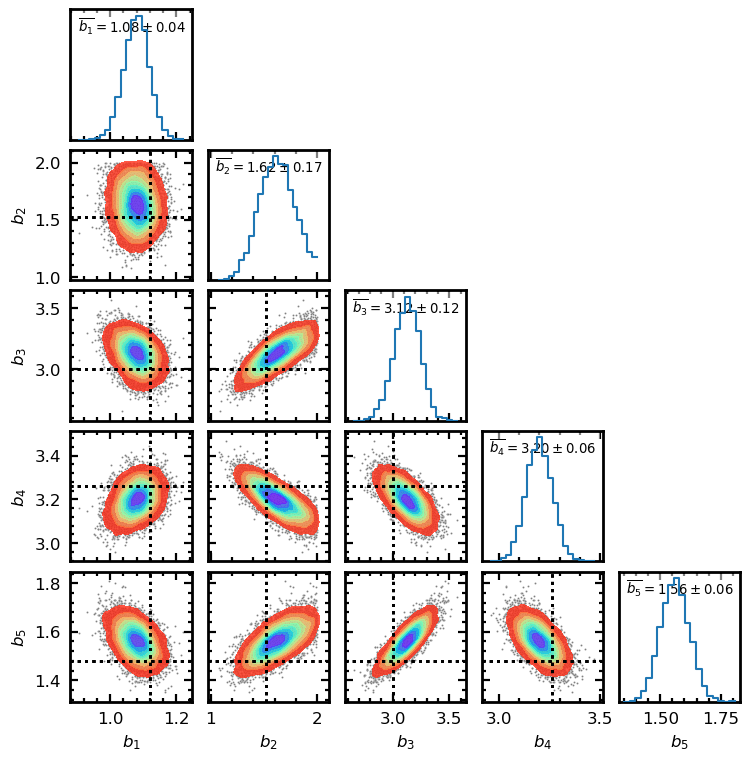

In [7]:
MC_data= np.load('MC_chain_data.npy')
scorner.scorner(MC_data, cols = ["$b_1$","$b_2$","$b_3$","$b_4$","$b_5$"],
                 true_values=[1.12, 1.52, 3, 3.26, 1.48],# test_run = True,
                 dens_alpha = 0.8,show_stats=True, tlp= 0.3, cmap = 'rainbow_r',
                 hc =True, plot_form='png',plot_name = 'MC'
                 )